In [76]:
from datetime import datetime, timedelta
from tqdm import tqdm
from itertools import cycle
import random
from random import choice
import os
from collections import Counter

In [87]:
# Functions for plotting features
def plot_numerical_feature(data):
    print(f"Max: {max(data)}, Min: {min(data)}, Mean: {np.mean(data):.2f}, Median: {np.median(data)}")
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    sns.histplot(data, ax=axes[0], color=color_pal[0])

    sns.boxplot(data, ax=axes[1], color=color_pal[0], orient='h')

    plt.tight_layout()
    plt.show()
    return

def plot_categorical_feature(data):
    if len(np.unique(data)) > 50:
        print(f"{len(np.unique(data))} categorical features. Examples:")
        top_5_items = Counter(data).most_common(5)
        for item, count in top_5_items:
            print(f"{item} - {count} counts.")
        return

    # Column Chart
    if len(np.unique(data)) > 10:
        # Vertical plot layout
        fig, axes = plt.subplots(2, 1, figsize=(20, 10), height_ratios=(1/3, 2/3))
    else:
        # Horizontal plot layout
        fig, axes = plt.subplots(1, 2, figsize=(20, 5), width_ratios=(1/3, 2/3))
    s = data.value_counts().rename_axis('class').rename('count') # if x- and y-labels are important
    sns.barplot(x=s.index, y=s.values, order=s.index, ax=axes[0])
    axes[0].tick_params(axis='x', rotation=90)

    # Donut chart
    threshold_percent = 5
    threshold_count = s.sum() * threshold_percent / 100
    small_segments = s[s < threshold_count]
    pie_data = s.copy()
    if len(small_segments):
        pie_data['Other'] = small_segments.sum()
        pie_data.loc[small_segments.index] = np.nan
    pie_data = pie_data.dropna()

    axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    axes[1].add_artist(centre_circle)

    plt.tight_layout()
    plt.show()
    return

def plot_feature(data):
    if str(data[0]).replace(".", "").isdecimal():
        plot_numerical_feature(data)
    elif isinstance(data[0], list):
        plot_categorical_feature(data.explode().tolist())
    else:
        plot_categorical_feature(data)
    return

def plot_features(df):
    for feature in df.columns.values:
        print('-'*20)
        print(f"Feautre: {feature}")
        plot_feature(df[feature])
    return

# Functions for plotting features as a function of a target
def plot_numerical_feature_v_target(data, target):

    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    sns.histplot(data, ax=axes[0], color=color_pal[0])
    axes[0].set_title('Distribution Plot')

    sns.boxplot(data, ax=axes[1], color=color_pal[0], orient='h')
    axes[1].set_title('Box Plot')

    sns.scatterplot(x=data, y=target, ax=axes[2], color=color_pal[0])
    pfit, residuals, rank, singular_values, rcond = np.polyfit(x=data, y=target, deg=3, full=True)
    xfitted = np.linspace(min(data), max(data), 1000)
    fitmodel = np.poly1d(pfit)
    yfitted = fitmodel(xfitted)
    plt.plot(xfitted, yfitted, color=color_pal[1])
    r2 = float(1-residuals/(sum(np.square(target))))
    axes[2].set_title(f'Scatter Plot (R2 = {r2:.3f})')

    plt.tight_layout()
    plt.show()
    return

def plot_categorical_feature_v_target(data, target):
    if len(np.unique(data)) > 50:
        print(f"{len(np.unique(data))} categorical features. Examples:")
        top_5_items = Counter(data).most_common(5)
        for item, count in top_5_items:
            print(f"{item} - {count} counts.")
        return

    if len(np.unique(data)) > 10:
        fig, axes = plt.subplots(2, 1, figsize=(20, 10), height_ratios=(1/3, 2/3))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(20, 5), width_ratios=(1/3, 2/3))
    s = data.value_counts().rename_axis('class').rename('count') # if x- and y-labels are important
    sns.barplot(x=s.index, y=s.values, order=s.index, ax=axes[0])
#     sns.countplot(x=data, ax=axes[0])
    sns.boxplot(x=target, y=data, ax=axes[1], order=s.index, orient='h')
    plt.tight_layout()
    plt.show()
    return

def plot_feature_v_target(data, target):
    if str(data[0]).replace(".", "").isdecimal():
        plot_numerical_feature(data, target)
    else:
        plot_categorical_feature(data, target)
    return

def plot_features_v_target(df, target_name):
    for feature in df.columns.values:
        if feature == target_name:
            continue
        print(f"Feature: {feature}")
        plot_feature(df[feature], df[target_name])
    return

In [86]:
sns.set_style("whitegrid")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [85]:
df= pd.read_csv('/content/p.csv')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.shape

(48620, 12)

In [4]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
#replacing the abbreciations
df['pizza_size'] = df['pizza_size'].replace({'S':'Small','M':'Medium','L':'Large','XL':'Extra Large','XXL':'Double Extra Large'}, inplace = False)
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,Medium,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,Medium,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,Large,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,Large,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,Medium,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,Medium,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,Large,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,Small,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,Large,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
#grouping order id and total price
sales_per_order = df.groupby('order_id')['total_price'].sum().reset_index()
sales_per_order

,order_id,total_price
0,1,13.25
1,2,92.00
2,3,37.25
3,4,16.50
4,5,16.50
...,...,...
21345,21346,62.25
21346,21347,66.50
21347,21348,46.70
21348,21349,20.25


In [23]:
#Sales per day
sales_per_day = df.groupby('order_date')['order_id'].count().reset_index()
sales_per_day


,order_date,order_id
0,1/1/2015,161
1,1/10/2015,190
2,1/11/2015,123
3,1/12/2015,129
4,1/2/2015,188
...,...,...
353,9/5/2015,140
354,9/6/2015,145
355,9/7/2015,133
356,9/8/2015,124


In [24]:
sales_per_day.describe()

,order_id
count,358.000000
mean,135.810056
std,24.060677
min,73.000000
25%,122.000000
50%,133.000000
75%,146.000000
max,261.000000


In [25]:
# total number of pizza_size

df['pizza_size'].value_counts()


Large                 18526
Medium                15385
Small                 14137
Extra Large             544
Double Extra Large       28
Name: pizza_size, dtype: int64

In [26]:
#grouping order id and total price
sales_per_order = df.groupby('order_id')['total_price'].sum().reset_index()
sales_per_order

,order_id,total_price
0,1,13.25
1,2,92.00
2,3,37.25
3,4,16.50
4,5,16.50
...,...,...
21345,21346,62.25
21346,21347,66.50
21347,21348,46.70
21348,21349,20.25


In [36]:
# Pizza categories in dataset

df['pizza_category'].value_counts()


Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

In [91]:
df['order_hour'] = pd.to_timedelta(df['order_time']).dt.total_seconds() / 3600
reference_date = pd.to_datetime('1/1/2015', format='%d/%m/%Y')
parse_date_lambda = lambda date_str: pd.to_datetime(date_str, format='%d-%m-%Y') if '-' in date_str else pd.to_datetime(date_str, format='%d/%m/%Y')
df['order_datetime'] = df['order_date'].apply(parse_date_lambda)
df['order_day_number'] = (df['order_datetime'] - reference_date).dt.days
df['order_day_name'] = df['order_datetime'].dt.day_name()
parse_ingredients_lambda = lambda ingredient_str: ingredient_str.split(', ')
df['ingredients_list'] = df['pizza_ingredients'].apply(parse_ingredients_lambda)
df['ingredients_count'] = df['ingredients_list'].apply(lambda x: len(x))

--------------------
Feautre: pizza_id
Max: 48620, Min: 1, Mean: 24310.50, Median: 24310.5


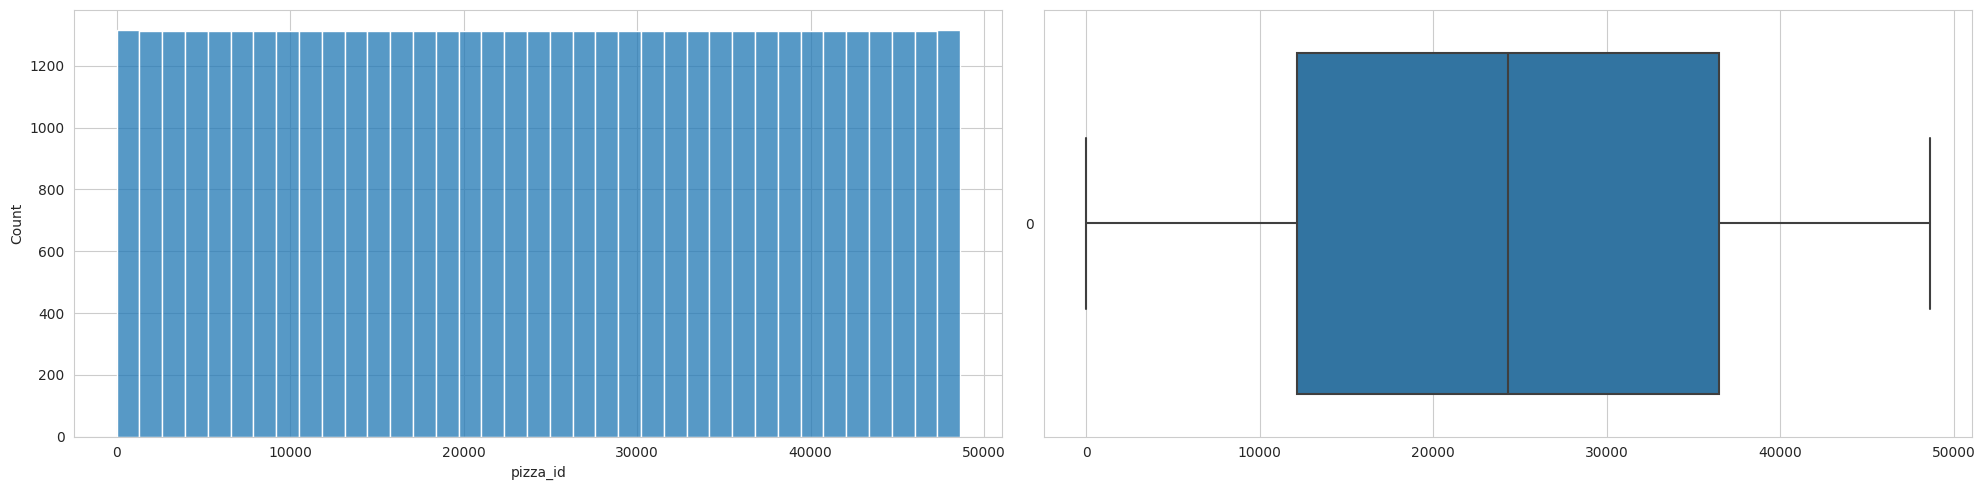

--------------------
Feautre: order_id
Max: 21350, Min: 1, Mean: 10701.48, Median: 10682.5


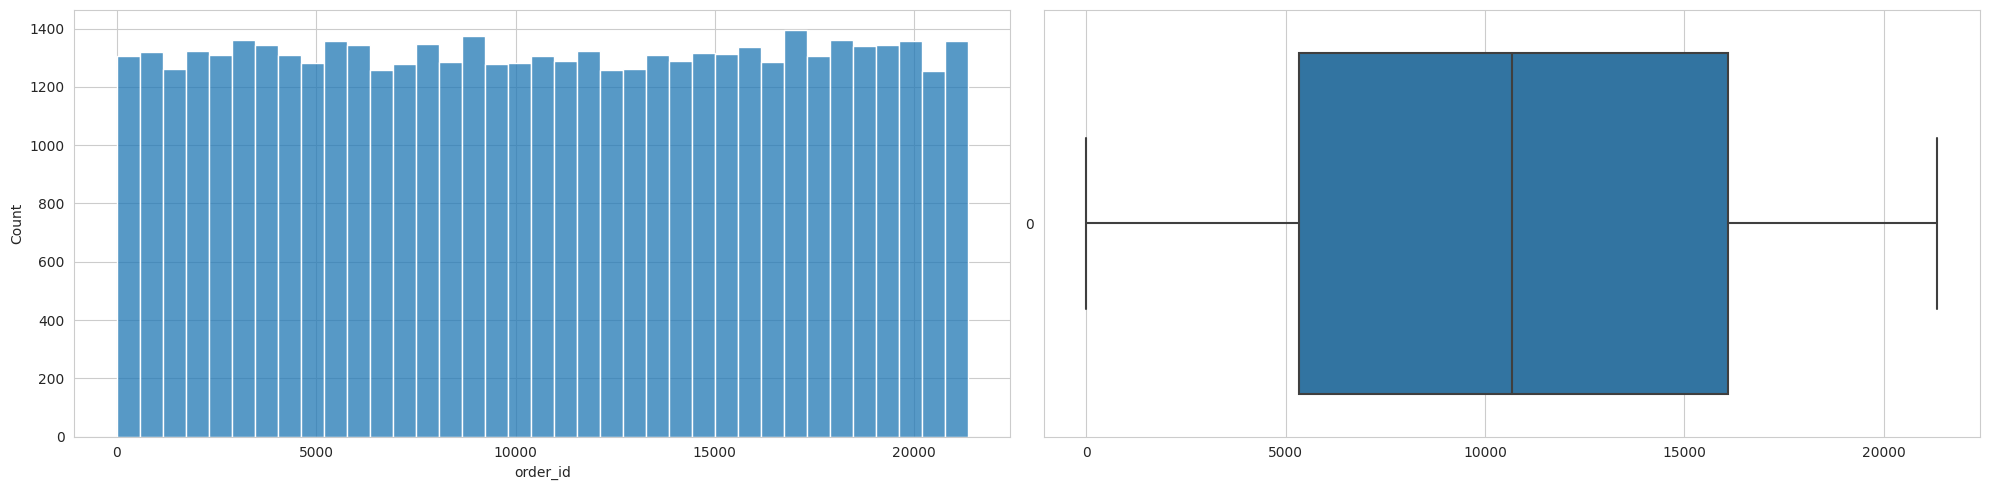

--------------------
Feautre: pizza_name_id
91 categorical features. Examples:
big_meat_s - 1811 counts.
thai_ckn_l - 1365 counts.
five_cheese_l - 1359 counts.
four_cheese_l - 1273 counts.
classic_dlx_m - 1159 counts.
--------------------
Feautre: quantity
Max: 4, Min: 1, Mean: 1.02, Median: 1.0


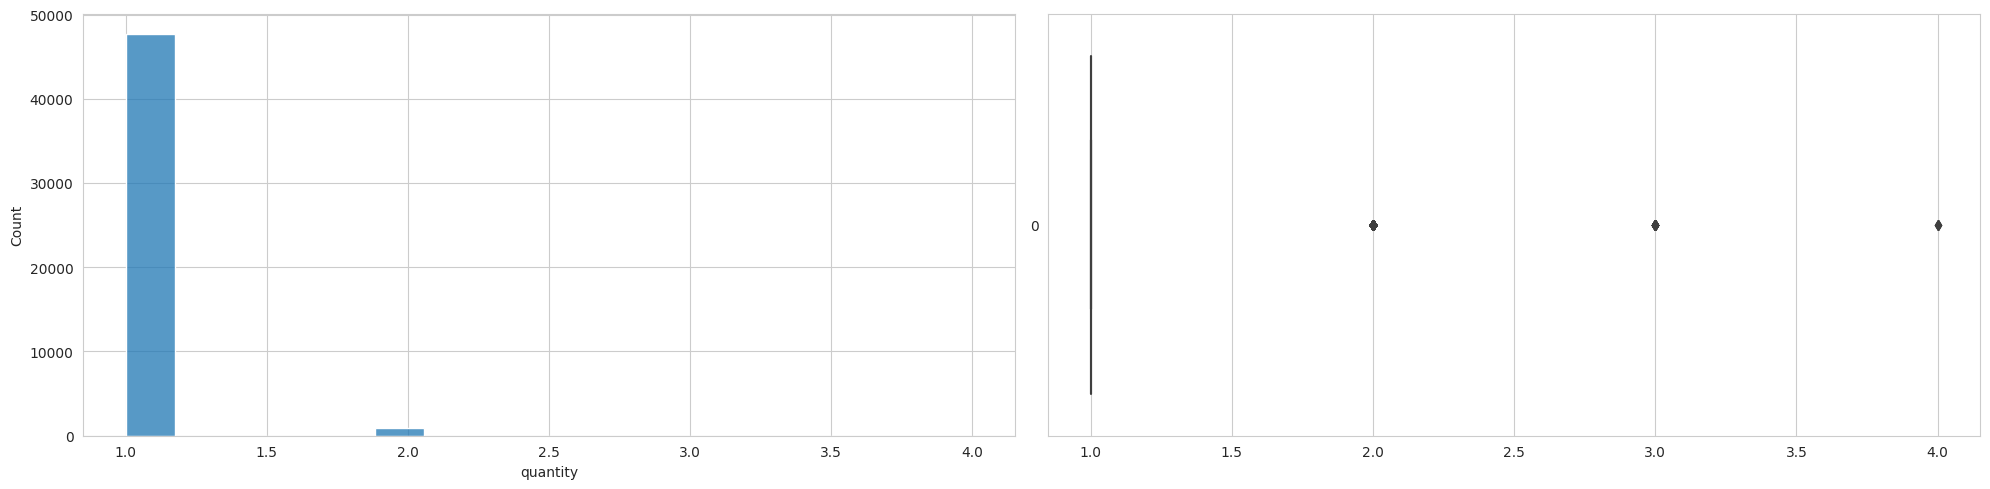

--------------------
Feautre: order_date
358 categorical features. Examples:
26/11/2015 - 261 counts.
27/11/2015 - 259 counts.
15/10/2015 - 258 counts.
4/7/2015 - 233 counts.
3/7/2015 - 207 counts.
--------------------
Feautre: order_time
16382 categorical features. Examples:
12:32:00 - 26 counts.
11:59:10 - 24 counts.
12:52:36 - 23 counts.
12:53:29 - 23 counts.
12:26:04 - 23 counts.
--------------------
Feautre: unit_price
Max: 35.95, Min: 9.75, Mean: 16.49, Median: 16.5


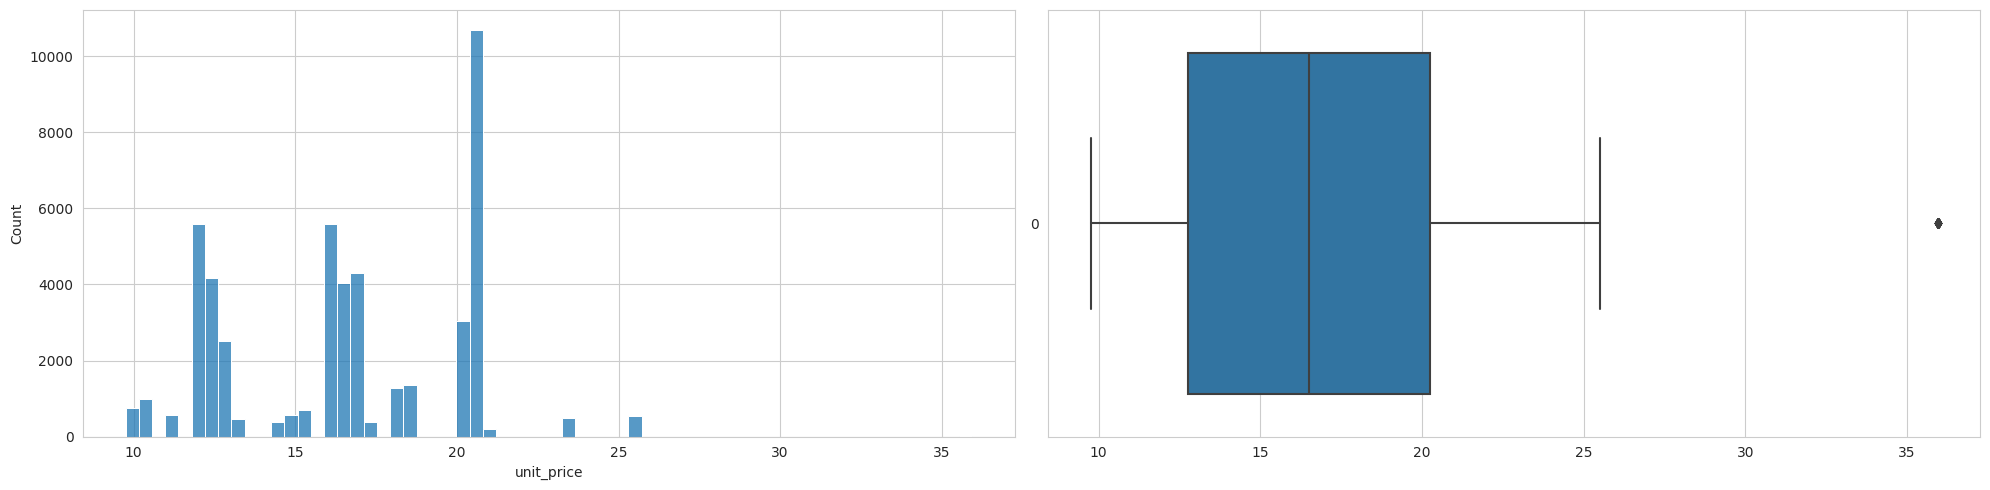

--------------------
Feautre: total_price
Max: 83.0, Min: 9.75, Mean: 16.82, Median: 16.5


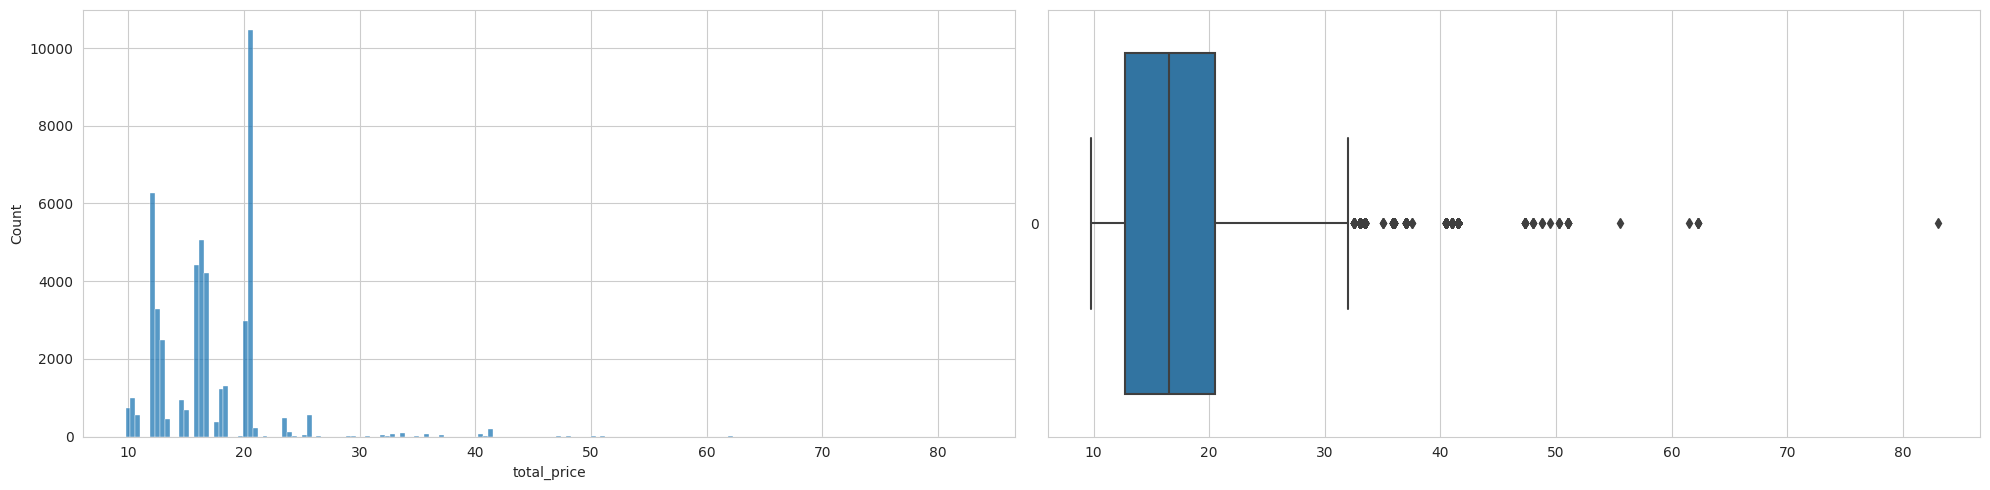

--------------------
Feautre: pizza_size


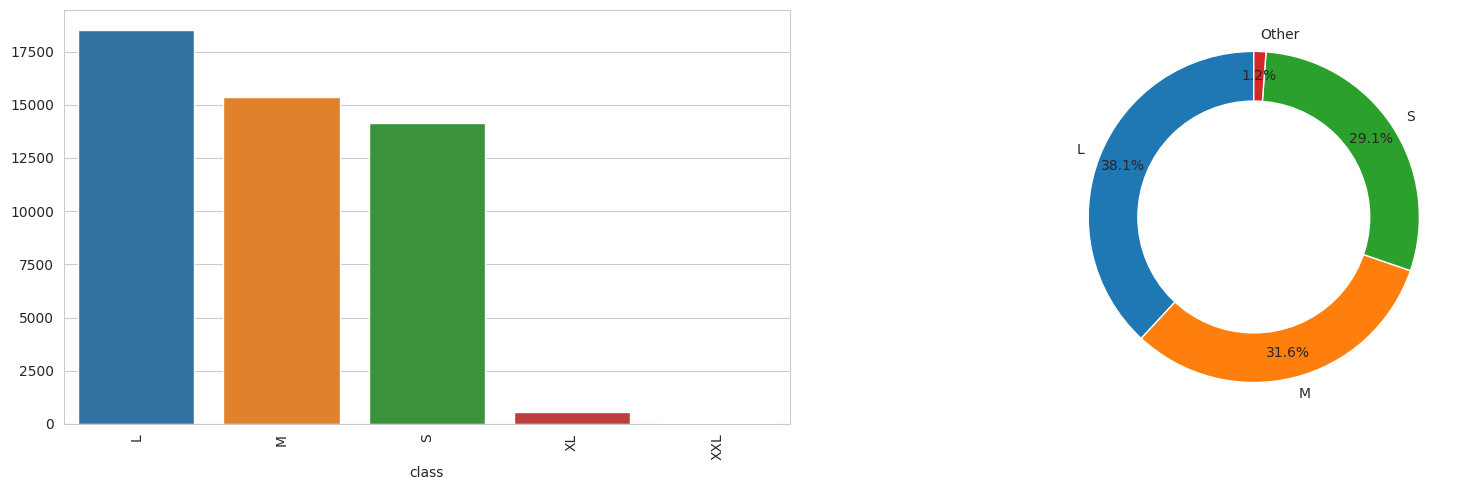

--------------------
Feautre: pizza_category


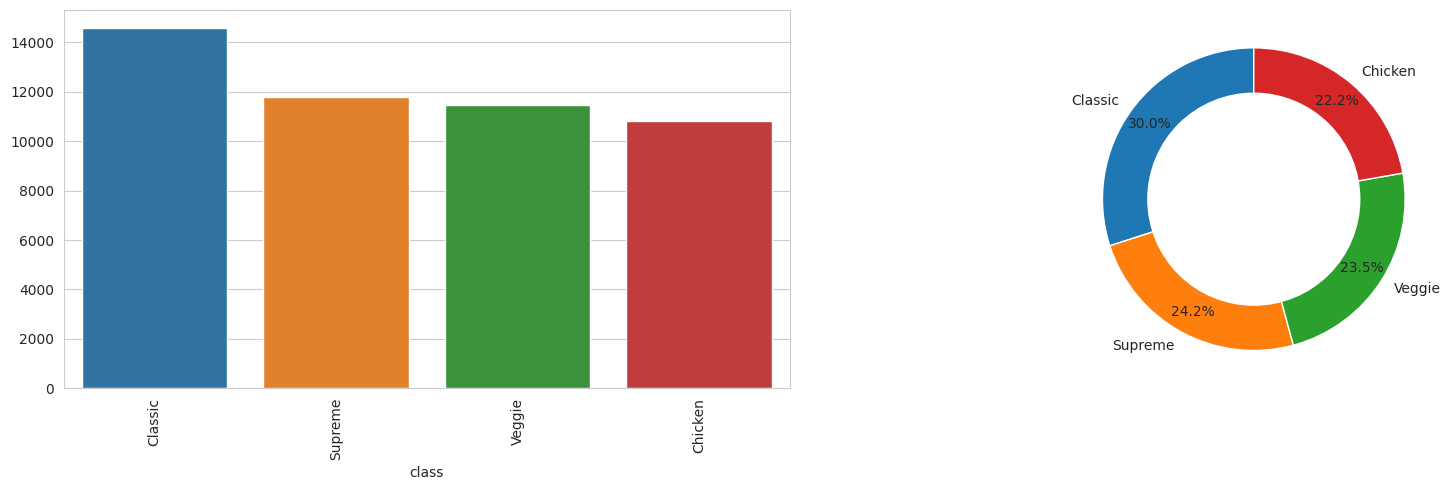

--------------------
Feautre: pizza_ingredients


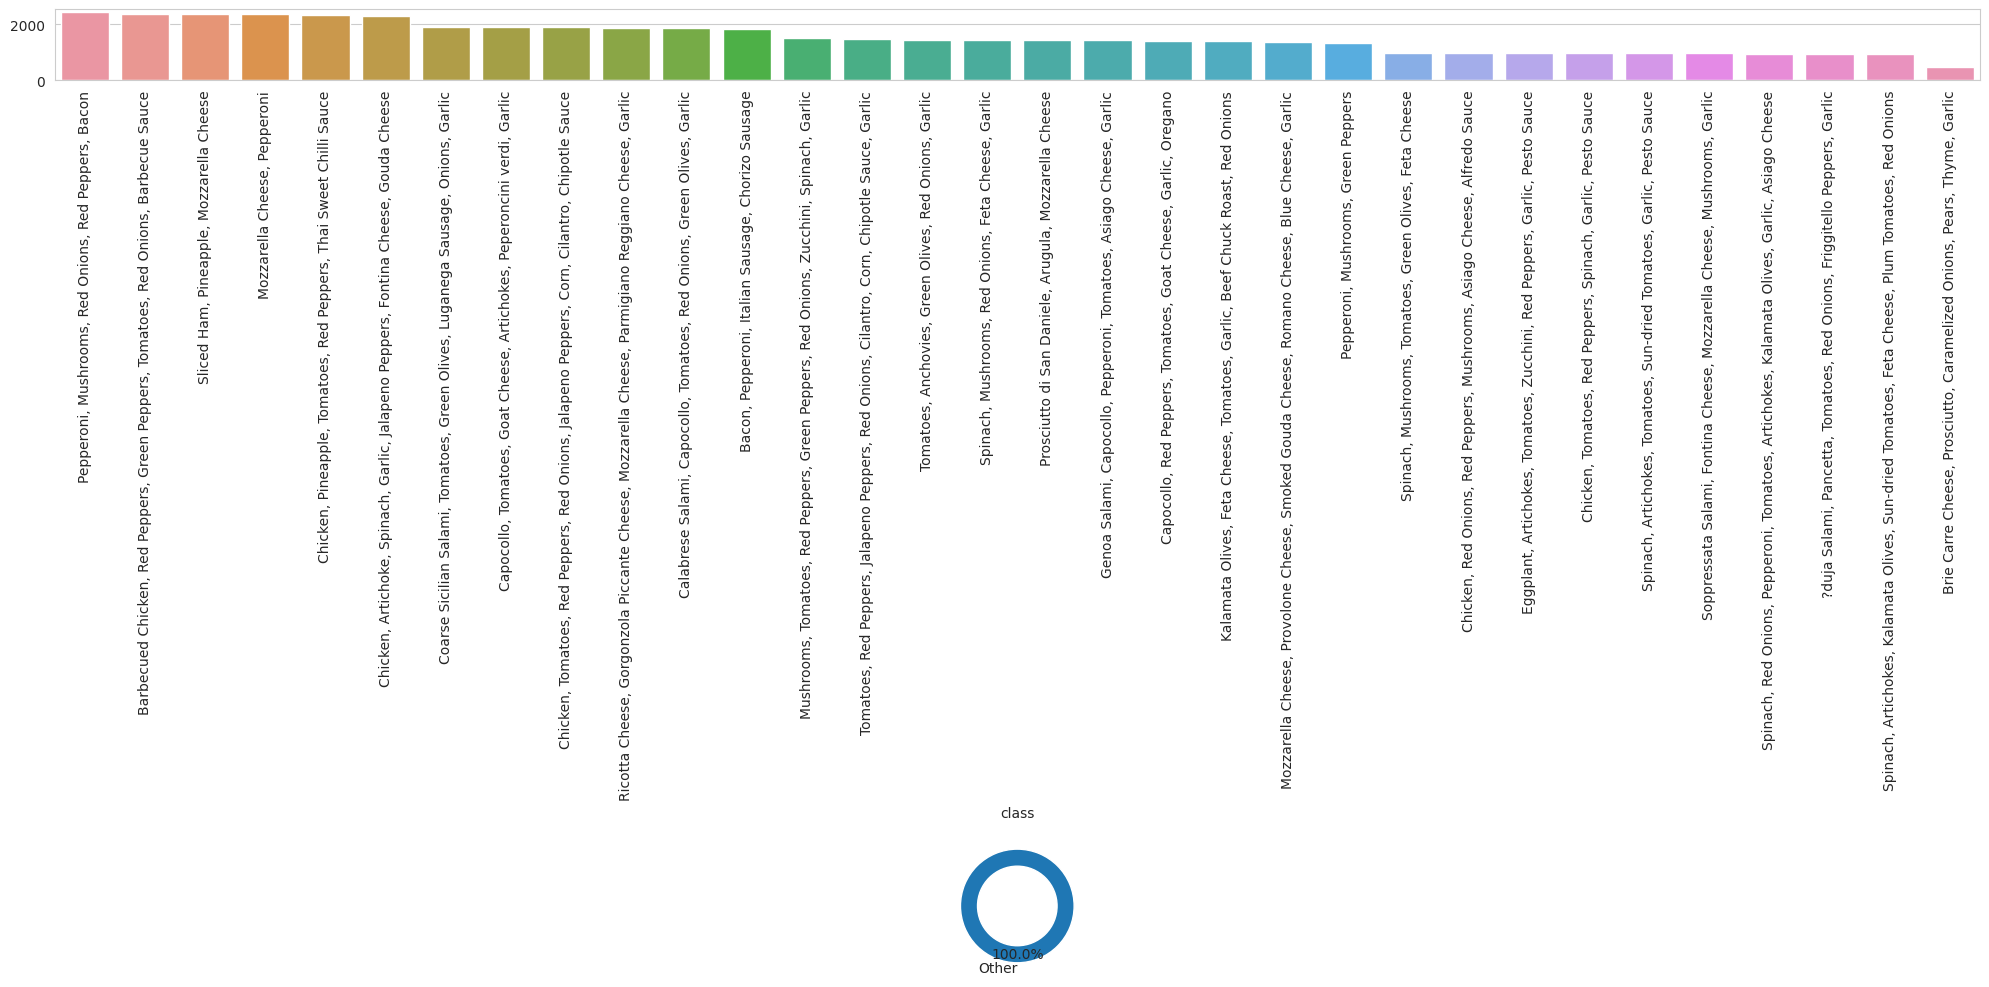

--------------------
Feautre: pizza_name


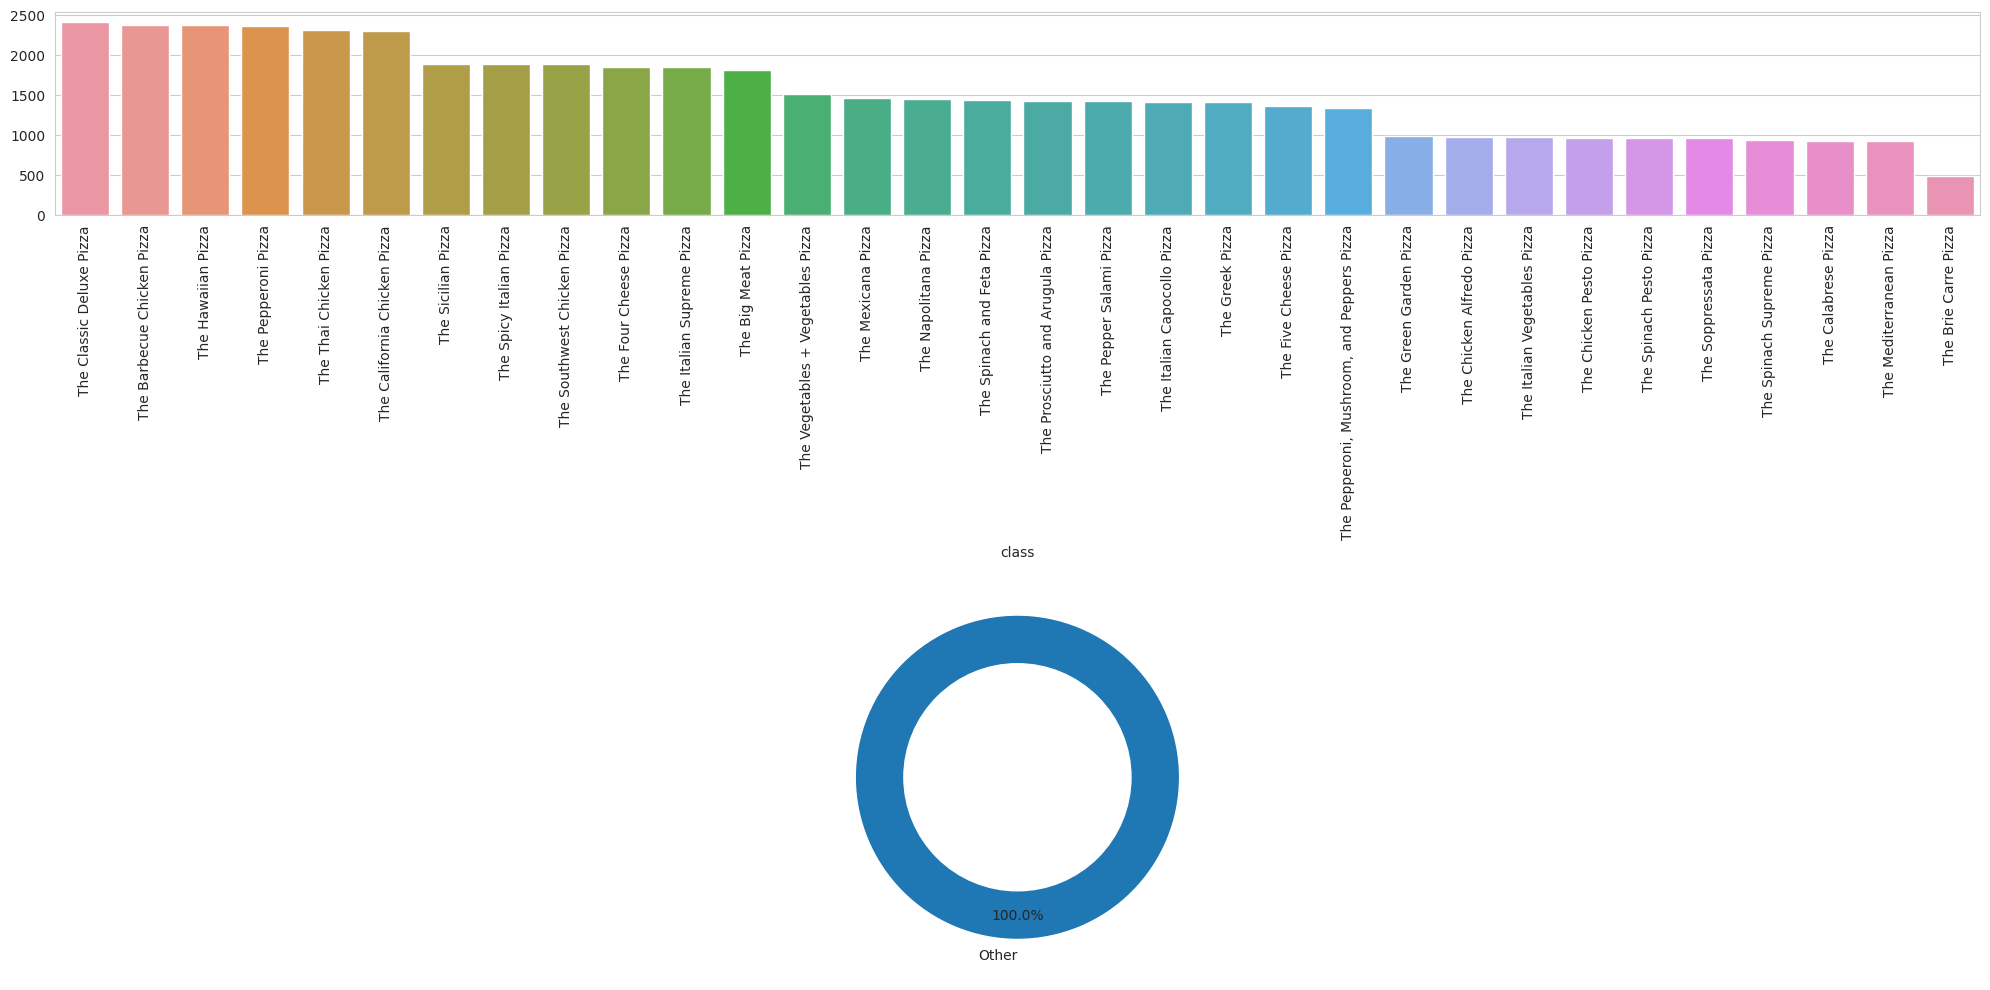

In [88]:
plot_features(df)


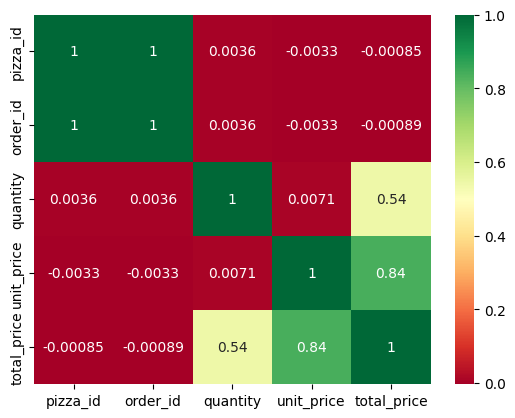

In [34]:
#correlation
numeric_columns = df.select_dtypes(include= ['number'])
sns.heatmap(numeric_columns.corr(),cmap = 'RdYlGn', annot =True)
plt.show()

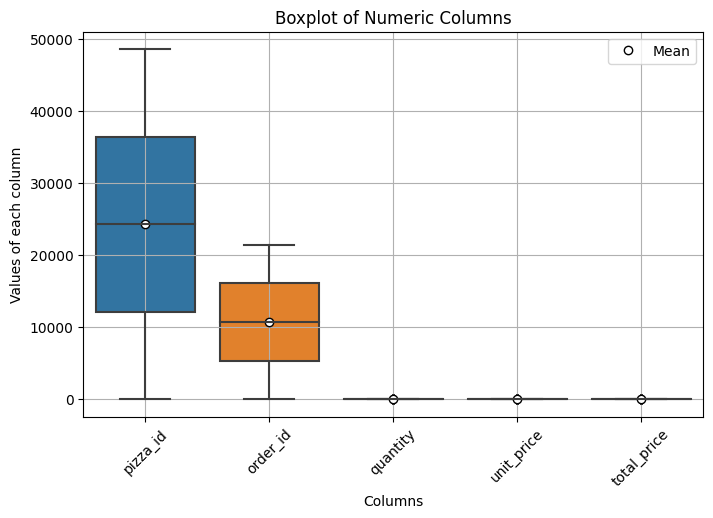

In [42]:
plt.figure(figsize=(8, 5))  # Set figure size
ax = sns.boxplot(data=df[numeric_columns.columns])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values of each column')
plt.grid(True)

# Calculate and plot the mean
mean_values = df[numeric_columns.columns].mean().values
plt.plot(range(len(mean_values)), mean_values, marker='o', markerfacecolor='white', markersize=6, markeredgecolor='black', linestyle='', label='Mean')

plt.legend()  # Show legend for mean marker
plt.show()

In [39]:
# Detect outliers using IQR (Interquartile Range)
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[~((df['total_price'] < Q1 - 1.5 * IQR) | (df['total_price'] > Q3 + 1.5 * IQR))]

#to show all outliers
outliers

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


<Axes: >

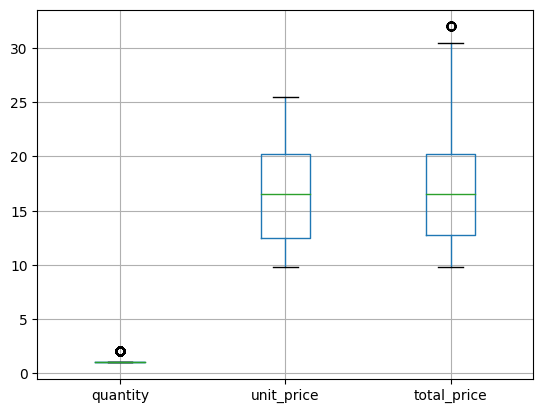

In [47]:
outliers.drop(columns=['pizza_id','order_id']).boxplot()


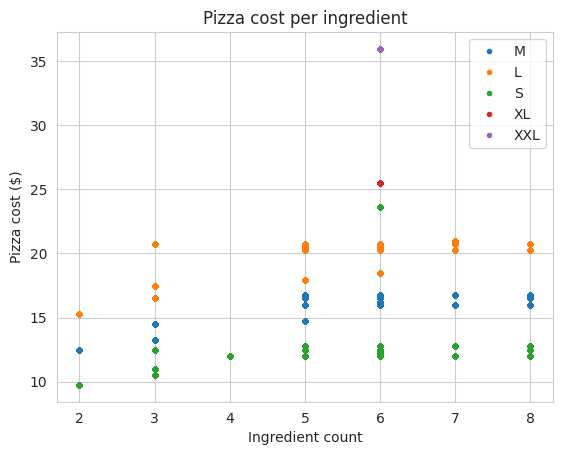

In [92]:
plt.figure()
for pizza_size in df['pizza_size'].unique():
    sub_df = df[df['pizza_size'] == pizza_size]
    plt.plot(sub_df['ingredients_count'], sub_df['unit_price'], '.')
plt.legend(df['pizza_size'].unique())
plt.ylabel("Pizza cost ($)")
plt.xlabel("Ingredient count")
plt.title("Pizza cost per ingredient")
plt.show()

In [53]:
###DATA VISUALISATION


Text(0, 0.5, 'Category Percentage')

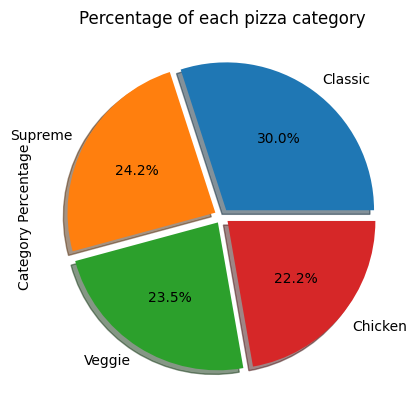

In [60]:
#the percentage of the online orders in the restauants
df['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.05, 0.05, 0.05 ,0.05], shadow=True)
plt.title('Percentage of each pizza category')
plt.ylabel('Category Percentage')

Text(0, 0.5, 'Count')

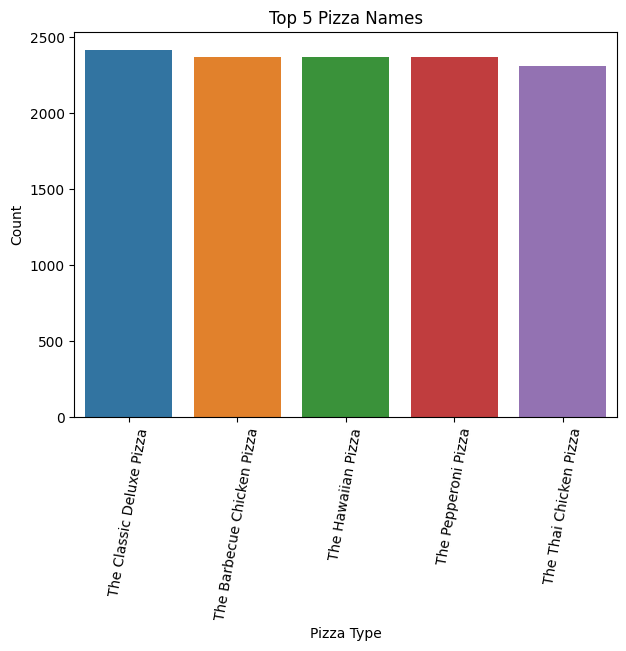

In [49]:
Top_5_types = df['pizza_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='pizza_name', order=Top_5_types)
plt.xticks(rotation=80)
plt.title('Top 5 Pizza Names')
plt.xlabel('Pizza Type')
plt.ylabel('Count')

Text(0, 0.5, 'pizza counts')

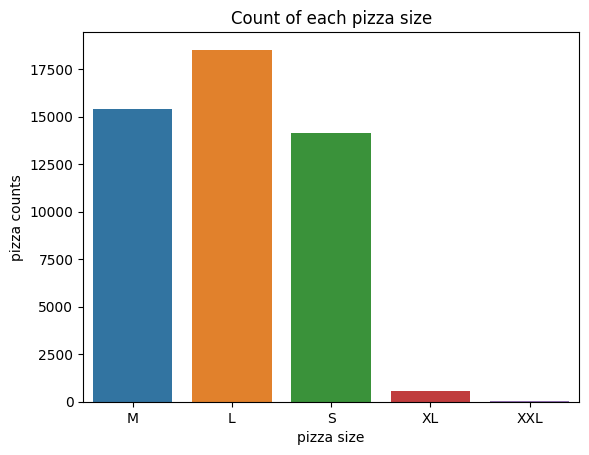

In [50]:
sns.countplot(data =df , x= 'pizza_size')
plt.title('Count of each pizza size')
plt.xlabel('pizza size')
plt.ylabel('pizza counts')

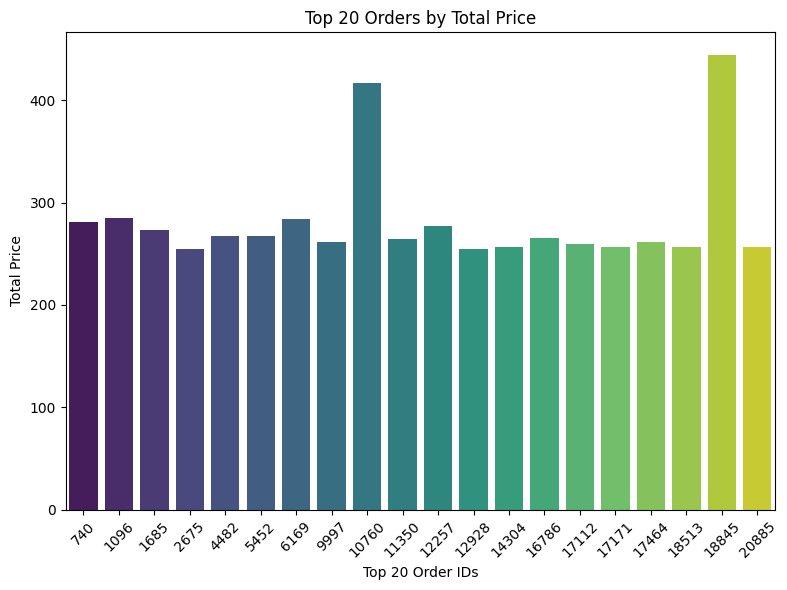

In [51]:
# Grouping by order_id and summing total_price for each order
order_total_prices = df.groupby('order_id')['total_price'].sum().reset_index()

# Sorting orders by total price in descending order
top_20_orders = order_total_prices.sort_values(by='total_price', ascending=False).head(20)

# Plotting the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='order_id', y='total_price', data=top_20_orders, palette='viridis')
plt.title('Top 20 Orders by Total Price')
plt.xlabel('Top 20 Order IDs')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Classic'),
  Text(1, 0, 'Veggie'),
  Text(2, 0, 'Supreme'),
  Text(3, 0, 'Chicken')])

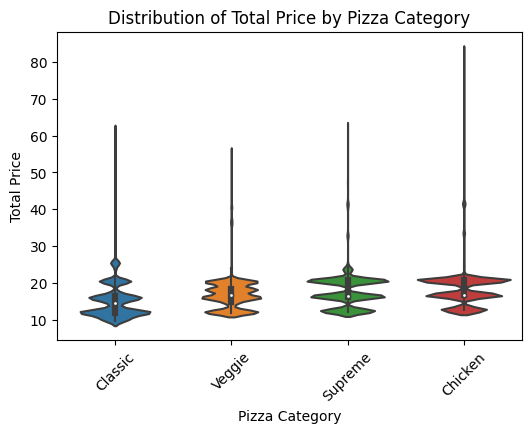

In [52]:
# violin plot could be a great option to visualize the distribution of numerical data across various categories
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='pizza_category', y='total_price')
plt.title('Distribution of Total Price by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45)

In [77]:
df['order_hour'] = pd.to_timedelta(df['order_time']).dt.total_seconds() / 3600
reference_date = pd.to_datetime('1/1/2015', format='%d/%m/%Y')
parse_date_lambda = lambda date_str: pd.to_datetime(date_str, format='%d-%m-%Y') if '-' in date_str else pd.to_datetime(date_str, format='%d/%m/%Y')
df['order_datetime'] = df['order_date'].apply(parse_date_lambda)
df['order_day_number'] = (df['order_datetime'] - reference_date).dt.days
df['order_day_name'] = df['order_datetime'].dt.day_name()
parse_ingredients_lambda = lambda ingredient_str: ingredient_str.split(', ')
df['ingredients_list'] = df['pizza_ingredients'].apply(parse_ingredients_lambda)
df['ingredients_count'] = df['ingredients_list'].apply(lambda x: len(x))


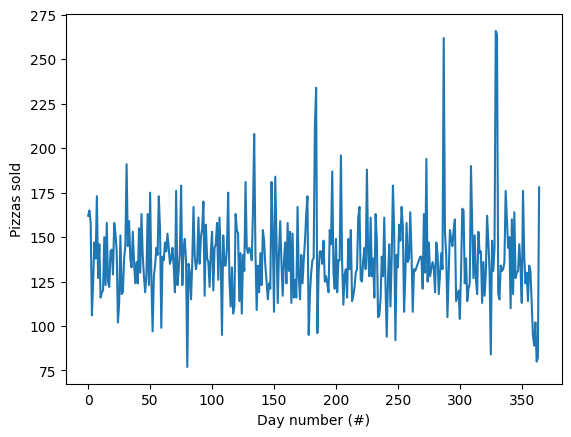

Top Selling Days:
  1 26/11/2015: 266 pizzas
  2 27/11/2015: 264 pizzas
  3 15/10/2015: 262 pizzas
  4 04/07/2015: 234 pizzas
  5 03/07/2015: 213 pizzas
Bottom Selling Days:
  1 22/03/2015: 77 pizzas
  2 29/12/2015: 80 pizzas
  3 30/12/2015: 82 pizzas
  4 22/11/2015: 84 pizzas
  5 27/12/2015: 89 pizzas
Closed Days: 
  1 24/09/2015
  2 25/09/2015
  3 05/10/2015
  4 12/10/2015
  5 19/10/2015
  6 26/10/2015
  7 25/12/2015


In [78]:
pizzas_per_day = df.groupby('order_day_number')['quantity'].sum()
plt.plot(pizzas_per_day)
plt.xlabel("Day number (#)")
plt.ylabel("Pizzas sold")
plt.show()
print("Top Selling Days:")
for i, index in enumerate(pizzas_per_day.nlargest(5).index):
    print(f"{i+1:{3}} {df[df['order_day_number'] == index]['order_datetime'].iloc[0].strftime('%d/%m/%Y')}: {pizzas_per_day[index]:.0f} pizzas")
print("Bottom Selling Days:")
for i, index in enumerate(pizzas_per_day.nsmallest(5).index):
    print(f"{i+1:{3}} {df[df['order_day_number'] == index]['order_datetime'].iloc[0].strftime('%d/%m/%Y')}: {pizzas_per_day[index]:.0f} pizzas")
print(f"Closed Days: ")
for i, day_number in enumerate([day for day in np.arange(364) if day not in df['order_day_number'].unique()]):
    print(f"{i+1:{3}} {(reference_date + timedelta(days=int(day_number))).strftime('%d/%m/%Y')}")

In [80]:
ingredients_list = df['ingredients_list'].explode().tolist()
print("Top selling ingredients:")
top_items = Counter(ingredients_list).most_common()
for i, (item, count) in enumerate(top_items):
    print(f"{i+1:{2}} {item:{30}} - {count} counts.")

Top selling ingredients:
 1 Garlic                         - 27422 counts.
 2 Tomatoes                       - 26601 counts.
 3 Red Onions                     - 19547 counts.
 4 Red Peppers                    - 16284 counts.
 5 Mozzarella Cheese              - 10333 counts.
 6 Pepperoni                      - 10300 counts.
 7 Spinach                        - 10012 counts.
 8 Mushrooms                      - 9624 counts.
 9 Chicken                        - 8443 counts.
10 Capocollo                      - 6572 counts.
11 Green Olives                   - 6174 counts.
12 Artichokes                     - 5682 counts.
13 Jalapeno Peppers               - 5643 counts.
14 Green Peppers                  - 5224 counts.
15 Feta Cheese                    - 4748 counts.
16 Pineapple                      - 4685 counts.
17 Bacon                          - 4227 counts.
18 Asiago Cheese                  - 3342 counts.
19 Cilantro                       - 3341 counts.
20 Corn                           - 3

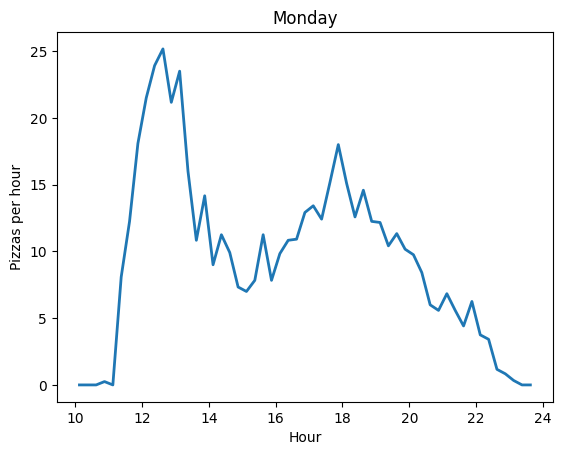

59.67 pizzas sold per day before 3pm, 75.44 pizzas sold after.


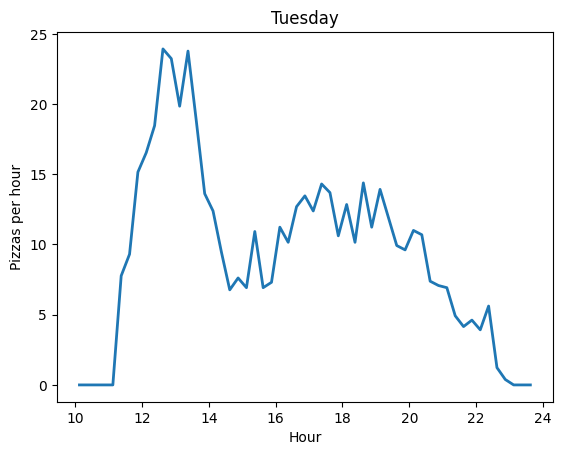

58.48 pizzas sold per day before 3pm, 74.12 pizzas sold after.


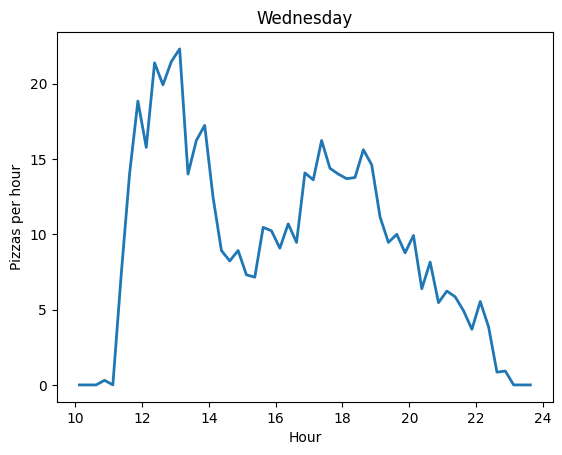

58.67 pizzas sold per day before 3pm, 74.90 pizzas sold after.


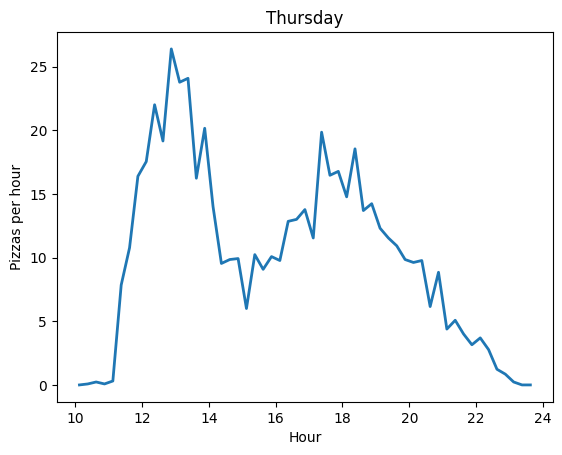

63.98 pizzas sold per day before 3pm, 79.83 pizzas sold after.


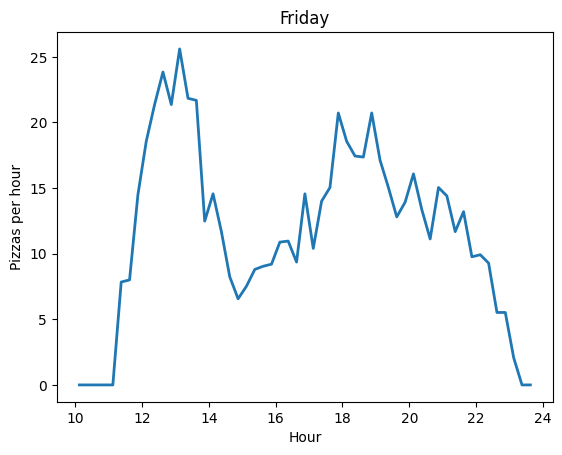

61.08 pizzas sold per day before 3pm, 103.76 pizzas sold after.


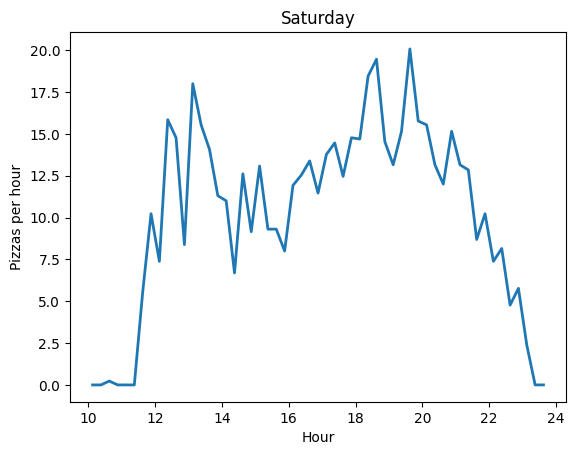

41.69 pizzas sold per day before 3pm, 102.40 pizzas sold after.


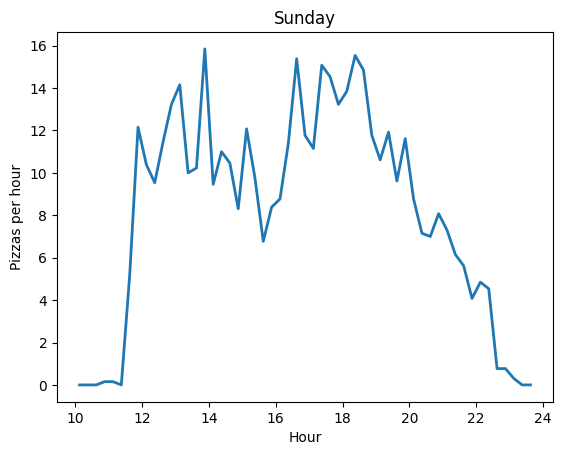

39.37 pizzas sold per day before 3pm, 76.69 pizzas sold after.


In [82]:
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    plt.figure()
    hist, bin_edges = np.histogram(df[df['order_day_name'] == day]['order_hour'], bins=np.arange(10, 24, 0.25))
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    total_days = len(df[df['order_day_name'] == day]['order_day_number'].unique())
    plt.plot(bin_centers, hist*4/total_days, linewidth=2)


#     plt.hist(df[df['order_day_name'] == day]['order_hour'], bins=30)
    plt.title(day)
    plt.xlabel("Hour")
    plt.ylabel("Pizzas per hour")
    plt.show()
    print(f"{df[(df['order_day_name'] == day) & (df['order_hour'] < 15)]['quantity'].sum()/total_days:.2f} pizzas sold per day before 3pm, {df[(df['order_day_name'] == day) & (df['order_hour'] >= 15)]['quantity'].sum()/total_days:.2f} pizzas sold after.")
